In [3]:
%matplotlib inline
import pandas as pd
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np
import math
import numba
from matplotlib.colors import LogNorm
import uproot_methods
from tqdm.auto import tqdm

from utils import set_plotting_style, numba_histogram, numba_histogram2d, make_profile, get_chunking, get_chunking_dask

In [4]:
set_plotting_style()

In [5]:
try:
    from yahist import Hist1D, Hist2D
except:
    !pip install git+git://github.com/aminnj/yahist.git#egg=yahist -U
    from yahist import Hist1D, Hist2D

In [6]:
t = uproot.open("/home/users/namin/2019/scouting/repo/batch/output2.root")["Events"]

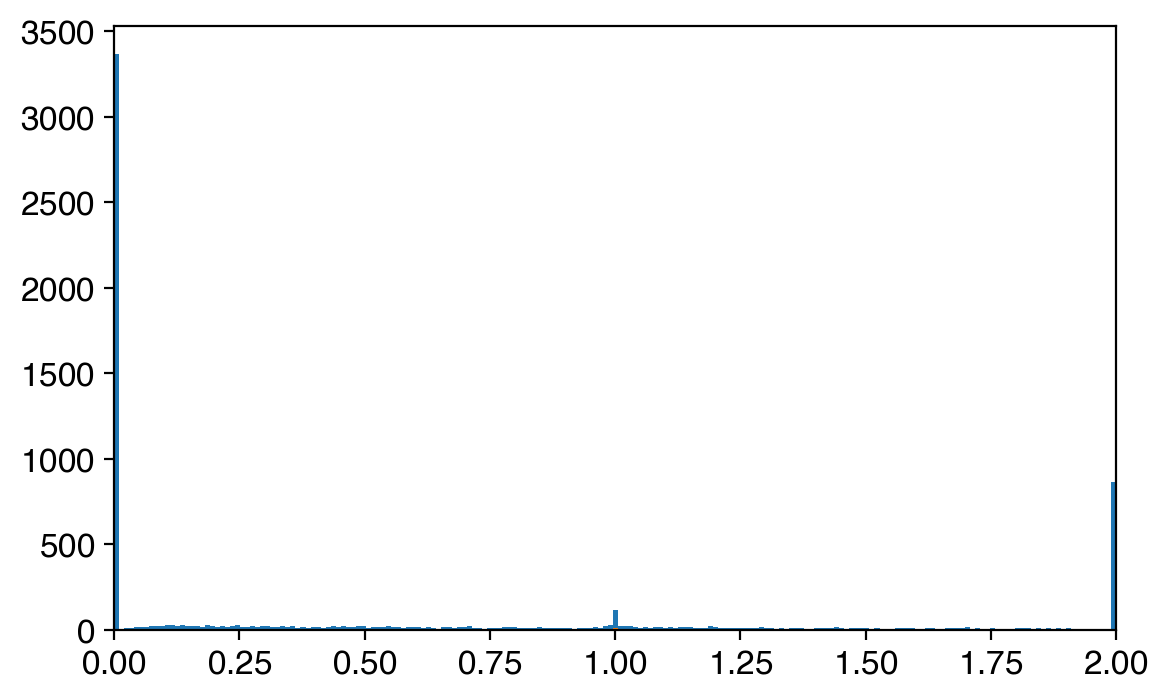

In [22]:
from coffea.processor import LazyDataFrame
lazy = LazyDataFrame(t)
leadpt = lazy["Muon_pt"][:,0]
subleadpt = lazy["Muon_pt"][:,1]
iso = lazy["Muon_trackIso"][:,1]
sel = (iso < 1.001) & (iso > 0.999) & (subleadpt < 0.5*leadpt)

Hist1D(iso,bins=np.linspace(0.0,2.0,200)).plot()

iso = iso[sel]
Hist1D(iso,bins=np.linspace(0.0,2.0,200)).plot()

Text(0.5, 1.0, 'Muon2_trackIso')

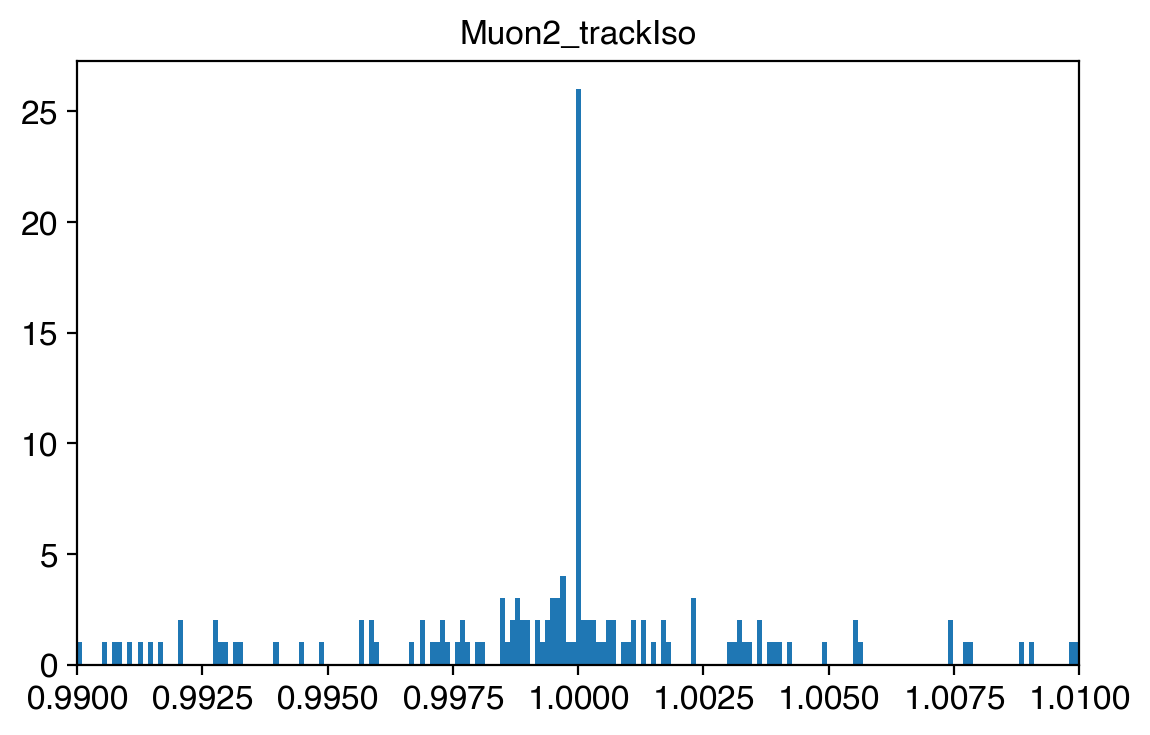

In [27]:
iso = lazy["Muon_trackIso"][:,1]
h = Hist1D(iso,bins=np.linspace(0.99,1.01,200),overflow=False)
h.plot()
ax = plt.gca()
ax.set_title("Muon2_trackIso")

In [25]:
iso

array([0.       , 0.       , 0.9514617, ..., 2.193734 , 0.       ,
       1.232715 ], dtype=float32)

In [8]:
mup4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(
    lazy["Muon_pt"][sel],
    lazy["Muon_eta"][sel],
    lazy["Muon_phi"][sel],
    0.105,
)[:,1]

tpt = lazy["Track_pt"][sel]
teta = lazy["Track_eta"][sel]
tphi = lazy["Track_phi"][sel]

tp4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(tpt,teta,tphi,0.)

In [9]:
# h = Hist1D(tp4.delta_r(mup4).flatten(),bins=np.linspace(0,5.0,100))
# h.plot()
tp4.shape

(12,)

In [10]:
# tp4[tp4.delta_r(mup4) < 0.01].pt

Text(0.5, 1.0, '(Muon2_pt - closest pT track pT)/Muon2_pt')

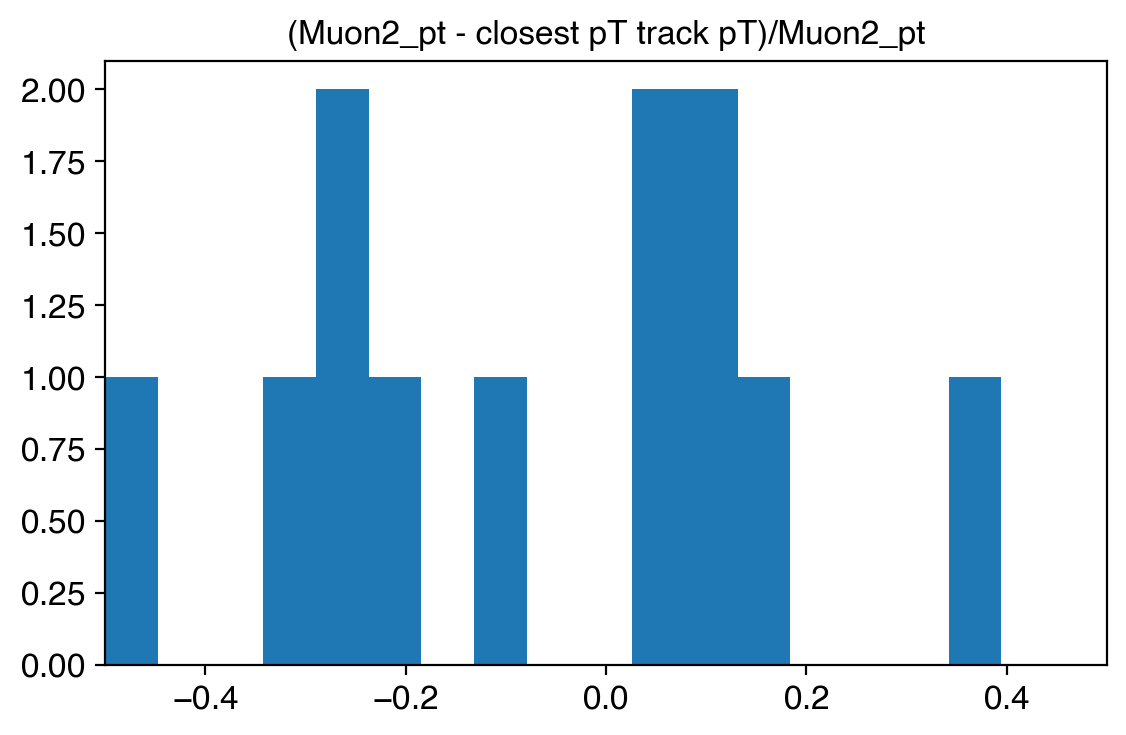

In [11]:
besttrackpt = tp4[np.abs(tp4.pt - mup4.pt).argmin()].flatten().pt

fracdiffs = (besttrackpt - mup4.pt)/mup4.pt

Hist1D(fracdiffs,bins=np.linspace(-0.5,0.5,20)).plot()
ax = plt.gca()
ax.set_title("(Muon2_pt - closest pT track pT)/Muon2_pt")

